In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import random
import time
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 3.0)
plt.rcParams['font.size'] = 16

# Aufgabe 7.1 Random Hamiltonians

In [18]:
N = 2000
A = np.random.randn(N, N)
H = (A + A) / np.sqrt(8)
h = np.linalg.eig(H)[0]
x = h / np.sqrt(N)

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
/usr/lib/python3.6/site-packages/numpy/lib/function_base.py:837: ComplexWarning: Casting complex values to real discards the imaginary part
  db = array(np.diff(bin_edges), float)
/usr/lib/python3.6/site-packages/matplotlib/transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/lib/python3.6/site-packages/matplotlib/transforms.py

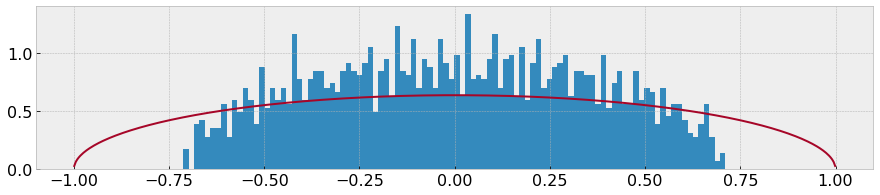

In [20]:
plt.hist(x, normed=True, bins=100)
p = np.linspace(-2, 2, 1000)
plt.plot(p, (2/np.pi) * np.sqrt(1 - p**2))
#plt.hist(p)

In [12]:
p

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

# Aufgabe 7.2 Verlet integration


In [11]:
def verlet(x, a, dt):
    x[1] = x[0] + 0.5 * a(0) * dt**2
    for t in range(len(x) - 2):
        x[t + 2] = 2 * x[t + 1] - x[t] + a(t+1) * dt**2
    return x

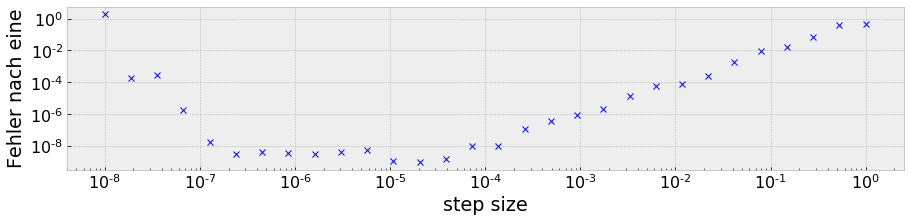

In [13]:
dts = 1 / 10**np.linspace(0, 8, 30)
a = lambda i: -x[i]

N = 2 * np.pi
for dt in dts:
    x = np.ones(int(N / dt))
    x = verlet(x, a, dt)
    plt.plot(dt, abs(1 - x[-1]), "x", c="b")
plt.loglog(), plt.xlabel("step size"), plt.ylabel("Fehler nach eine")
plt.show()

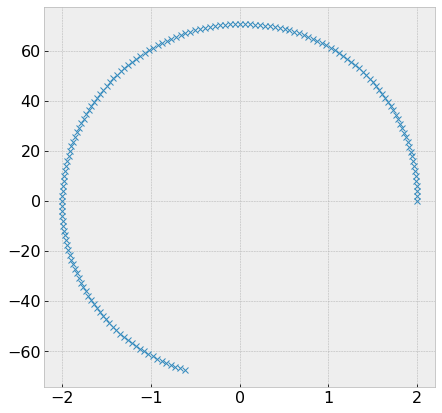

In [39]:
r0 = 2
x0, y0, px0, py0 = r0, 0, 0, np.sqrt((2 - r0) / r0)

dt = 0.04
N = 2 * np.pi
x, y= np.ones(int(N / dt)) * x0, np.ones(int(N / dt)) * y0
x[1] = x[0] + px0 * dt
y[1] = x[0] + py0 * dt
a1 = lambda i: -x[i]
a2 = lambda i: -y[i]

for t in range(len(x) - 2):
    x[t + 2] = 2 * x[t + 1] - x[t] + a1(t+1) * dt**2
    y[t + 2] = 2 * y[t + 1] - y[t] + a2(t+1) * dt**2
plt.figure(figsize=(7,7))
plt.plot(x, y, "x")

In [ ]:
#x, y, px, py = np.ones(int(N / dt)) * x0, np.ones(int(N / dt)) * y0, np.ones(int(N / dt)) * py0, np.ones(int(N / dt)) * py0, 
